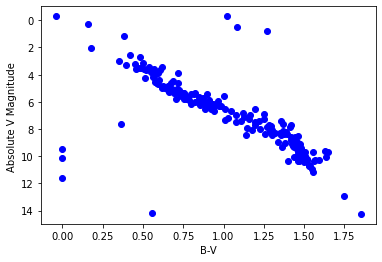

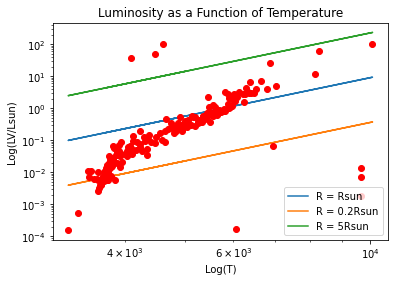

In [21]:
# Question 2

# part A

import numpy as np
import matplotlib.pyplot as plt
with open('hipparcos.txt') as f:
    lines = f.readlines()
    par = [float(s) for s in [line.split()[0] for line in lines]]
    mv = [float(s) for s in [line.split()[1] for line in lines]]
    mb = [float(s) for s in [line.split()[2] for line in lines]]
    abmag = [a - 5*np.log10(100/b) for a,b in zip(mv, par)] # these are the Mv values
                                                            # (y axis)
C = []
for i in range(len(mb)):
    difference = mb[i] - mv[i]
    C.append(difference) # these are the (B-V) values (x axis)
  
plt.plot(C, abmag, 'bo')
plt.gca().invert_yaxis()
plt.xlabel('B-V')
plt.ylabel('Absolute V Magnitude ')

plt.show()
plt.savefig('phys375a1q2a.png')

# part b
T = []
for i in range(len(C)):
    temp = 9000/(C[i] + 0.93)
    T.append(temp)
L = []
for i in range(len(abmag)):
    lum = (10**(0.4*(4.74-abmag[i])))
    L.append(lum)
# part c
sb = 5.67e-8 # stefan boltzmann constant 
rsun = 6.9634e8 # radius of the sun 
lsun = 3.826e26 # luminosity of sun
lumc1 = [] # for R = R sun
for i in range(len(T)):
    lumi1 = ((4*np.pi)*(rsun**2)*(sb)*(T[i]**4))/lsun
    lumc1.append(lumi1)   

lumc2 = [] # for R = 0.2Rsun
for i in range(len(T)):
    lumi2 = ((4*np.pi)*((0.2*rsun)**2)*(sb)*(T[i]**4))/lsun
    lumc2.append(lumi2)

lumc3 = [] # for R = 5Rsun
for i in range(len(T)):
    lumi3 = ((4*np.pi)*((5*rsun)**2)*(sb)*(T[i]**4))/lsun
    lumc3.append(lumi3)

plt.loglog(T, lumc1, label='R = Rsun')
plt.loglog(T, lumc2, label='R = 0.2Rsun')
plt.loglog(T, lumc3, label='R = 5Rsun')

#REMEMBER TO COMMENT OUT PART C SO THAT YOU CAN SUBMIT THE PLOT FOR PART B 

plt.loglog(T, L, 'ro')
plt.xlabel('Log(T)')
plt.ylabel('Log(LV/Lsun)')
plt.legend(loc='best')
plt.title('Luminosity as a Function of Temperature')
plt.show()


    

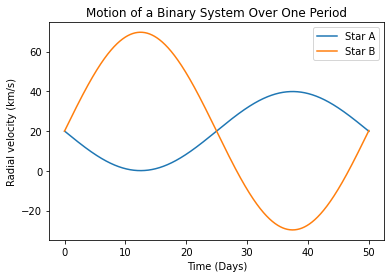

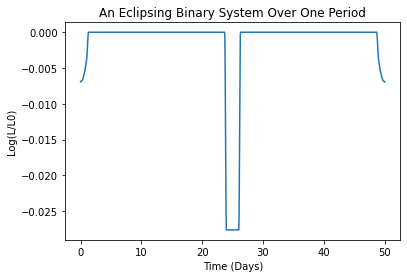

0.0
[0.0068964]
0.027622400000000005
[0.70687115]
0.39189686991162065


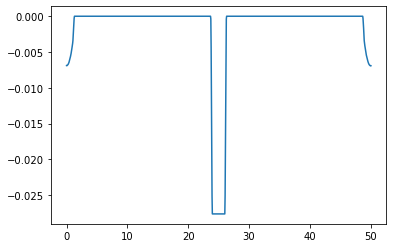

In [44]:
# Question 3
# part a

import numpy as np
import matplotlib.pyplot as plt
with open('W21_ps1_orbit.dat') as f:
    lines = f.readlines()
    phase = [float(s) for s in [line.split()[0] for line in lines]]
    vrada = [float(s) for s in [line.split()[1] for line in lines]] # for star a
    vradb = [float(s) for s in [line.split()[2] for line in lines]]
    mag = [float(s) for s in [line.split()[3] for line in lines]]
time=[]
for i in range(len(phase)):
    day = 50*(phase[i])
    time.append(day)

plt.plot(time, vrada,label='Star A') 
plt.plot(time, vradb, label='Star B')
plt.title('Motion of a Binary System Over One Period')
plt.xlabel('Time (Days)')
plt.ylabel('Radial velocity (km/s)')
plt.legend(loc='best')
plt.show()

#part b 
#vmaxa = (max(vrada)*1000) # multiply by 1000 to convert from km/s to m/s
#vmaxb = (max(vradb)*1000)
#G = 6.67e-11 # gravitational constant, in units of 
             # N*m^2/kg^2
#p = 4.32e6   # period, in seconds
#vmax = [vmaxa,vmaxb]
#for i in range(len(vmax)):
    #msin3i = (p*vmax[i])/(2*np.pi*G)
    #print(msin3i)

# part c

loglum = []
for i in range(len(mag)):
    magbol = 0.4*(min(mag)-mag[i])
    loglum.append(magbol)
    
plt.plot(time, loglum) 
plt.title('An Eclipsing Binary System Over One Period')
plt.xlabel('Time (Days)')
plt.ylabel('Log(L/L0)')
plt.show()

#part d
print(max(loglum)) # finding the max value 
line2d = plt.plot(time, loglum)
xvalues = line2d[0].get_xdata()
yvalues = line2d[0].get_ydata()
idx = np.where(xvalues==xvalues[0])
yvalues[idx]
deltaf2 = max(loglum) - yvalues[idx]
print(deltaf2)
deltaf1 = max(loglum)-min(loglum)
print(deltaf1)
tempratio = (deltaf2/deltaf1)**(0.25)
print(tempratio)

radratio = abs(vrada[50])/abs(vradb[50])
print(radratio)